In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

# Parameter Initialization in Skolik Architecture

Skolik for some reason initializes the rotational weights between 0 and pi. But why? Why pi and not 2pi? The output scaling and input scaling weights are all initialized as 1. Heere we are going to see if there are any differences in performance when we change the initialization of the rotational weights.

In [2]:
skolik_0_pi_path = "../../results/parameters_initialization/skolik_0andpi"
skolik_0_2pi_path = "../../results/parameters_initialization/skolik_0and2pi"

skolik_0_pi = Analysis(skolik_0_pi_path)
skolik_0_2pi = Analysis(skolik_0_2pi_path)

In [4]:
skolik_0_pi_rewards = skolik_0_pi.get_rewards()
skolik_0_2pi_rewards = skolik_0_2pi.get_rewards()

skolik_0_pi_mean_return = np.mean(skolik_0_pi_rewards, axis=0)
skolik_0_2pi_mean_return = np.mean(skolik_0_2pi_rewards, axis=0)

skolik_0_pi_std_return = np.std(skolik_0_pi_rewards, axis=0)
skolik_0_2pi_std_return = np.std(skolik_0_2pi_rewards, axis=0)

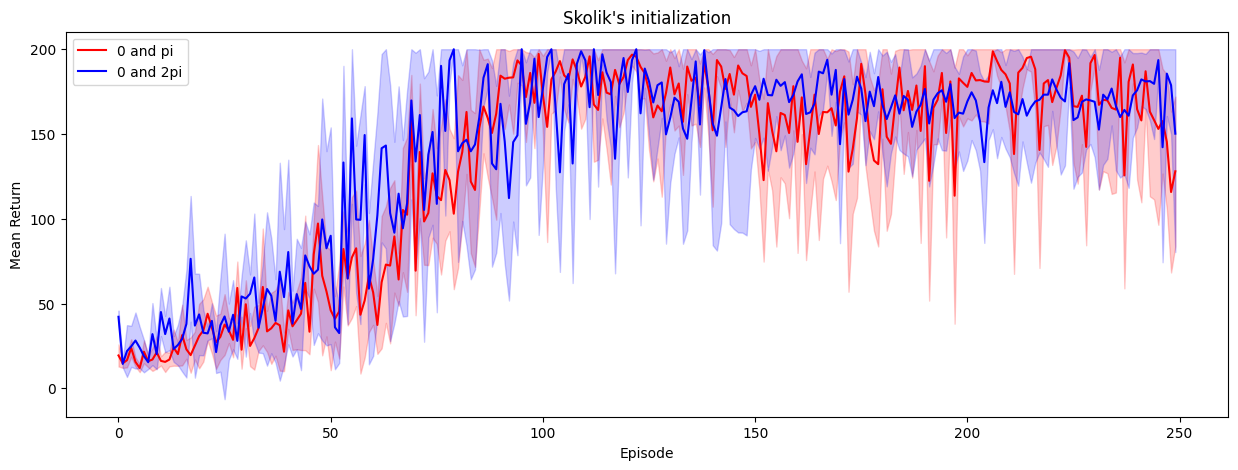

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.plot(skolik_0_pi_mean_return, color = "red", label="0 and pi")
axs.fill_between(np.arange(len(skolik_0_pi_mean_return)), skolik_0_pi_mean_return - skolik_0_pi_std_return, np.clip(skolik_0_pi_mean_return + skolik_0_pi_std_return, a_min = None, a_max = 200), alpha=0.2, color="red")
axs.plot(skolik_0_2pi_mean_return, color = "blue", label="0 and 2pi")
axs.fill_between(np.arange(len(skolik_0_2pi_mean_return)), skolik_0_2pi_mean_return - skolik_0_2pi_std_return, np.clip(skolik_0_2pi_mean_return + skolik_0_2pi_std_return, a_min = None, a_max = 200), alpha=0.2, color="blue")

axs.set_title("Skolik's initialization")
axs.set_xlabel("Episode")
axs.set_ylabel("Mean Return")
axs.legend()

plt.show()
